In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox

In [2]:
df = pd.read_csv('data/clean_data.csv')

<AxesSubplot:ylabel='HasAvailability'>

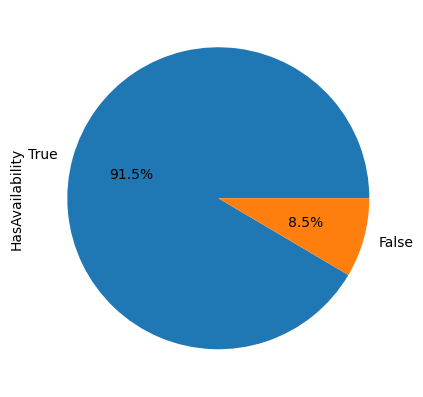

In [3]:
availability = df['HasAvailability'].value_counts()
fig = plt.figure(figsize=(5, 5), dpi= 100)
ax = plt.subplot(111)

availability.plot(kind='pie', ax=ax, autopct='%1.1f%%',
                   shadow= False, startangle=0)

imbalanced data where majority are availabel and minority aren't, need resampling

In [4]:
df_has_available = df.loc[df['HasAvailability'] == True]
df_no_available = df[df["HasAvailability"] == False]

<AxesSubplot:title={'center':'Availability by hour in 30 days excluding 24:00 - 8:00'}>

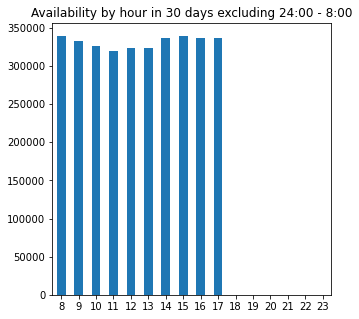

In [5]:
hour = df_has_available['Hour'].value_counts().sort_index()

hour.plot.bar(title="Availability by hour in 30 days excluding 24:00 - 8:00", rot=0,figsize=(5, 5))

<AxesSubplot:title={'center':'Availability by hour in 30 days excluding 18:00 - 8:00'}>

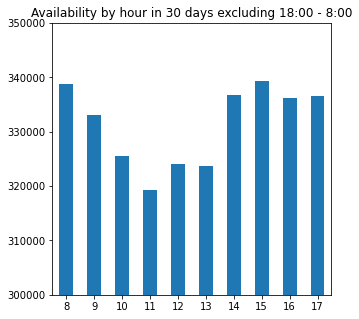

In [6]:
hour[:-6].plot.bar(title="Availability by hour in 30 days excluding 18:00 - 8:00", rot=0, ylim=(300000,350000), figsize=(5, 5))

<AxesSubplot:>

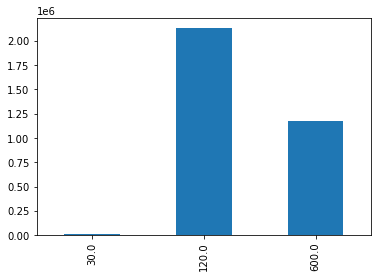

In [7]:
ParkingTimeLimitCategory = df_has_available['ParkingTimeLimitCategory'].value_counts().sort_index()
ParkingTimeLimitCategory.plot.bar()

<AxesSubplot:>

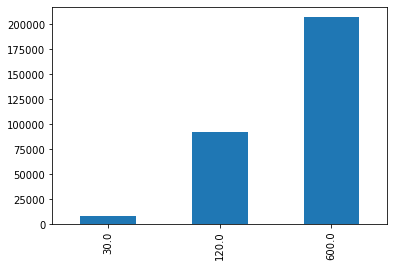

In [8]:
ParkingTimeLimitCategory_neg = df_no_available['ParkingTimeLimitCategory'].value_counts().sort_index()
ParkingTimeLimitCategory_neg.plot.bar()

<AxesSubplot:>

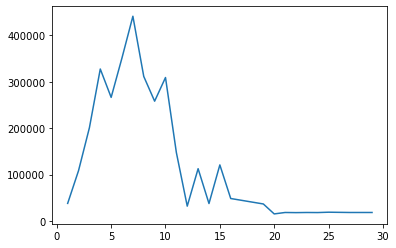

In [9]:
ParkingSpaceCount = df_has_available['ParkingSpaceCount'].value_counts().sort_index()
ParkingSpaceCount.plot.line()

<AxesSubplot:>

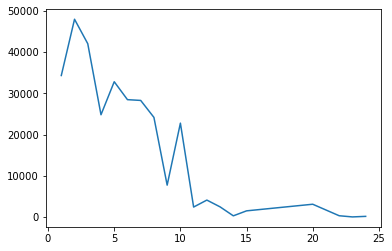

In [10]:
ParkingSpaceCount_neg = df_no_available['ParkingSpaceCount'].value_counts().sort_index()
ParkingSpaceCount_neg.plot.line()

In [11]:
ParkingCategory = df_has_available['ParkingCategory'].value_counts().sort_index()
ParkingCategory 

Paid Parking               2876119
Restricted Parking Zone     437513
Name: ParkingCategory, dtype: int64

In [12]:
ParkingCategory_neg = df_no_available['ParkingCategory'].value_counts().sort_index()
ParkingCategory_neg

Paid Parking               304279
Restricted Parking Zone      3150
Name: ParkingCategory, dtype: int64

In [13]:
PaidParkingSubArea = df_has_available['PaidParkingSubArea'].value_counts().sort_index()
PaidParkingSubArea

North     738330
South    2575302
Name: PaidParkingSubArea, dtype: int64

In [14]:
PaidParkingSubArea_neg = df_no_available['PaidParkingSubArea'].value_counts().sort_index()
PaidParkingSubArea_neg

North    112555
South    194874
Name: PaidParkingSubArea, dtype: int64

Parking is free in Seattle on Weekend and Holidays :) How would this affect our prediction?

In [15]:
df['Holiday'].value_counts()

False    3621061
Name: Holiday, dtype: int64

In [16]:
location = df_no_available[["Location"]]
location = location.value_counts().rename_axis("loc").reset_index(name="counts")
location['strip_location'] = location['loc'].str[7:-1]
location = location.drop(columns='loc')
location[['lat', 'log']] = location.strip_location.str.split(' ',expand=True)
location = location.drop(columns='strip_location')

In [17]:
location = location[['log','lat','counts']]
location['lat'] = pd.to_numeric(location['lat'])
location['log'] = pd.to_numeric(location['log'])
points = location.to_numpy()

In [18]:
import folium
from folium import plugins

In [19]:
m1 = folium.Map(location=[47.6256, -122.3344], zoom_start=14)
plugins.HeatMap(points).add_to(m1)
# m1.save('data/map1.html')
m1

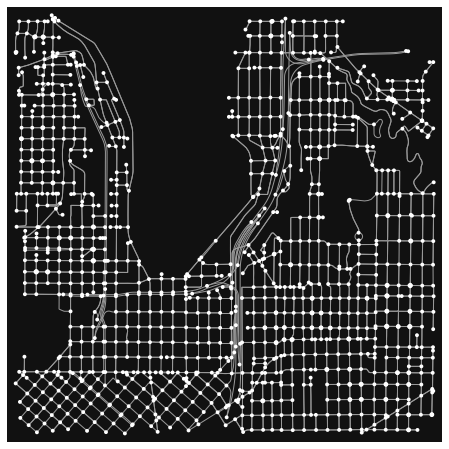

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [20]:
streets = ox.graph_from_point((47.63, -122.33), dist=1800, network_type = 'drive')
ox.plot_graph(streets)